In [32]:
import pyfmi
import numpy as np
from matplotlib import pyplot as plt

In [33]:
##PATH TO FMU FILE: 
pth = "../fmus/"
fnm = "hx_delta.fmu"
print(pth+fnm)

../fmus/hx_delta.fmu


In [34]:
#CREATE AN FMU model OBJECT:
fmu = pyfmi.load_fmu(pth+fnm)
fmu

In [35]:
## LIST THE VARIABLES ASSOCIATED WITH THE MODEL:
model_variables = fmu.get_model_variables()
print(model_variables)
variable_names = fmu.get_model_variables().keys()

OrderedDict([('T1_in', <pyfmi.fmi.ScalarVariable2 object at 0x000001FBA122C680>), ('m1_in', <pyfmi.fmi.ScalarVariable2 object at 0x000001FBA122E7A0>), ('T2_in', <pyfmi.fmi.ScalarVariable2 object at 0x000001FBA09C8360>), ('m2_in', <pyfmi.fmi.ScalarVariable2 object at 0x000001FBA12A76A0>), ('T2_out', <pyfmi.fmi.ScalarVariable2 object at 0x000001FBA12A47C0>), ('m2_out', <pyfmi.fmi.ScalarVariable2 object at 0x000001FBA12A6200>), ('T1_out', <pyfmi.fmi.ScalarVariable2 object at 0x000001FBA12A4180>), ('m1_out', <pyfmi.fmi.ScalarVariable2 object at 0x000001FBA12A41D0>), ('K', <pyfmi.fmi.ScalarVariable2 object at 0x000001FBA1352A70>), ('T1_ini', <pyfmi.fmi.ScalarVariable2 object at 0x000001FBA1350630>), ('T2_ini', <pyfmi.fmi.ScalarVariable2 object at 0x000001FBA1351F30>), ('cp1', <pyfmi.fmi.ScalarVariable2 object at 0x000001FBA1350E00>), ('cp2', <pyfmi.fmi.ScalarVariable2 object at 0x000001FBA1351B70>), ('m1', <pyfmi.fmi.ScalarVariable2 object at 0x000001FBA1350EA0>), ('m2', <pyfmi.fmi.ScalarVa

In [36]:
## PRINT THE DEFAULT VALUES OF THE VARIABLES STORED IN THE FMU FILE:
for variable_name in variable_names:
    value = fmu.get(variable_name)
    print(variable_name + ': '+ str(value))

T1_in: [0.]
m1_in: [0.]
T2_in: [0.]
m2_in: [0.]
T2_out: [0.]
m2_out: [0.]
T1_out: [0.]
m1_out: [0.]
K: [2584000.]
T1_ini: [68.]
T2_ini: [91.]
cp1: [4190.]
cp2: [4190.]
m1: [400.]
m2: [400.]
time: [0.]


In [37]:
## SET THE INITIAL CONDITIONS FOR THE OUTPUT TEMPERATURES:
T1_ini = 91
fmu.set('T1_ini',T1_ini)
T2_ini = 68
fmu.set('T2_ini',T2_ini)

In [38]:
## SETTING THE SIMULATION TIMES:
final_time = 20.0 
step_size = 0.1
nsteps = int(final_time/step_size) #number of time steps
times = np.arange(0,final_time,step_size)

# SIMULATION OPTIONS
opts = fmu.simulate_options()
opts["ncp"] = nsteps # number of output points

In [39]:
## DEFINE INPUT OBJECT for SIMULATION
T1_ins = T1_ini*np.ones(nsteps)
T2_ins = T2_ini*np.ones(nsteps)
m1_ins = 56*np.ones(nsteps)
m2_ins = 46*np.ones(nsteps)
u = np.transpose(np.vstack((times ,T1_ins,T2_ins,m1_ins,m2_ins)))
# Simulate the model response , given the initial parameters
input_labels = ['T1_in','T2_in','m1_in','m2_out']
input_object = (input_labels,u)

In [40]:
#SIMULATE:
res = fmu.simulate(final_time=final_time,options=opts, input=input_object)

Simulation interval    : 0.0 - 20.000000000000004 seconds.
Elapsed simulation time: 0.005882299999939278 seconds.


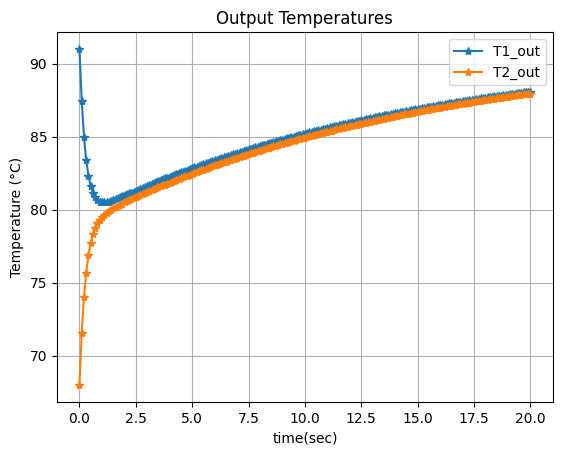

In [41]:
#PLOT THE RESULTS:
T1_outs = np.array(res['T1_out'])
T2_outs = np.array(res['T2_out'])

fig,ax = plt.subplots()
ax.plot(res['time'],T1_outs,'*-',label='T1_out')
ax.plot(res['time'],T2_outs,'*-',label='T2_out')
ax.grid()
plt.xlabel('time(sec)')
plt.ylabel('Temperature (°C)')
plt.title('Output Temperatures')
ax.legend()